In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [85]:
df = pd.read_excel("Downloads/random_forest_dataset.xlsx")

In [86]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13,4,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82,32.8,88,17.6,13,1,31.6,81.2,A
4,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85,34,96,19.2,13,4,36.2,87.8,A


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   118 non-null    object
 1   Unnamed: 1   118 non-null    object
 2   Unnamed: 2   118 non-null    object
 3   Unnamed: 3   117 non-null    object
 4   Unnamed: 4   118 non-null    object
 5   Unnamed: 5   118 non-null    object
 6   Unnamed: 6   118 non-null    object
 7   Unnamed: 7   118 non-null    object
 8   Unnamed: 8   118 non-null    object
 9   Unnamed: 9   118 non-null    object
 10  Unnamed: 10  110 non-null    object
 11  Unnamed: 11  110 non-null    object
 12  Unnamed: 12  118 non-null    object
 13  Unnamed: 13  118 non-null    object
 14  Unnamed: 14  110 non-null    object
dtypes: object(15)
memory usage: 14.0+ KB


In [88]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,118,118,118,117,118,118.0,118,118,118,118.0,110,110,118,118,110
unique,118,118,118,116,30,30.0,28,29,27,28.0,7,7,45,66,5
top,Sl No,USN,Name,Development of Streamlined Data Storage Process,91,18.2,80,32,94,18.8,14,4,0,0,A
freq,1,1,1,2,12,12.0,13,13,12,12.0,38,43,8,8,48


In [89]:
df.shape

(118, 15)

In [90]:
df.isnull().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     1
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    8
Unnamed: 11    8
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    8
dtype: int64

In [91]:
dfFinal = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis = 1)

In [92]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 4   118 non-null    object
 1   Unnamed: 5   118 non-null    object
 2   Unnamed: 6   118 non-null    object
 3   Unnamed: 7   118 non-null    object
 4   Unnamed: 8   118 non-null    object
 5   Unnamed: 9   118 non-null    object
 6   Unnamed: 10  110 non-null    object
 7   Unnamed: 11  110 non-null    object
 8   Unnamed: 12  118 non-null    object
 9   Unnamed: 13  118 non-null    object
 10  Unnamed: 14  110 non-null    object
dtypes: object(11)
memory usage: 10.3+ KB


In [93]:
dfFinal = dfFinal.drop(0,axis = 0)

In [94]:
features = list(dfFinal.columns)
features.remove('Unnamed: 14')
features

['Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13']

In [95]:
for col in features:
    dfFinal[col] = pd.to_numeric(dfFinal[col])

In [96]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 1 to 117
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 4   117 non-null    int64  
 1   Unnamed: 5   117 non-null    float64
 2   Unnamed: 6   117 non-null    float64
 3   Unnamed: 7   117 non-null    float64
 4   Unnamed: 8   117 non-null    int64  
 5   Unnamed: 9   117 non-null    float64
 6   Unnamed: 10  109 non-null    float64
 7   Unnamed: 11  109 non-null    float64
 8   Unnamed: 12  117 non-null    float64
 9   Unnamed: 13  117 non-null    float64
 10  Unnamed: 14  109 non-null    object 
dtypes: float64(8), int64(2), object(1)
memory usage: 10.2+ KB


In [97]:
dfFinal['Unnamed: 14'].unique()

array(['A', 'S', 'B', nan, 'C'], dtype=object)

In [98]:
dfFinal['Unnamed: 14'] = dfFinal['Unnamed: 14'].map({'A':1, 'B': 2, 'C': 3, 'S': 0})

In [99]:
dfFinal['Unnamed: 14'].isnull().sum()

8

In [100]:
dfFinal['Unnamed: 14'] = dfFinal['Unnamed: 14'].fillna(4)

In [101]:
dfFinal['Unnamed: 14'].isnull().sum()

0

In [167]:
for col in features:
    dfFinal[col] = dfFinal[col].fillna(dfFinal[col].mean())

In [169]:
X = dfFinal[features]
X

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,78,15.6,85.0,34.0,93,18.6,13.000000,4.000000,35.6,85.2
2,84,16.8,82.0,32.8,77,15.4,15.000000,5.000000,35.4,85.0
3,84,16.8,82.0,32.8,88,17.6,13.000000,1.000000,31.6,81.2
4,88,17.6,85.0,34.0,96,19.2,13.000000,4.000000,36.2,87.8
5,84,16.8,82.0,32.8,77,15.4,15.000000,5.000000,35.4,85.0
...,...,...,...,...,...,...,...,...,...,...
113,92,18.4,90.0,36.0,94,18.8,13.000000,4.000000,35.8,90.2
114,100,20.0,100.0,40.0,100,20.0,15.000000,5.000000,40.0,100.0
115,87,17.4,92.0,36.8,92,18.4,14.000000,5.000000,37.4,91.6
116,0,0.0,0.0,0.0,0,0.0,13.091743,3.651376,0.0,0.0


In [170]:
y = dfFinal['Unnamed: 14']
y

1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
113    0.0
114    0.0
115    0.0
116    4.0
117    2.0
Name: Unnamed: 14, Length: 117, dtype: float64

In [128]:
dfFinal.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2,1.0
2,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,1.0
3,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2,1.0
4,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8,1.0
5,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,1.0


In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [176]:
rfc = RandomForestClassifier(random_state=1)

In [177]:
param = {'n_estimators':[100]}

In [178]:
gridS = GridSearchCV(estimator=rfc, param_grid=param, cv=5)

In [179]:
gridS.fit(X_train, y_train)

C:\ProgramData\anaconda31\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'n_estimators': [100]})

In [182]:
best_Params = gridS.best_params_

In [183]:
rfc = RandomForestClassifier(**best_Params, random_state=1)

In [184]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [187]:
classnames = ['S','A','B','C','Unknown']

In [188]:
y_train_pred = rfc.predict(X_train)
cm1 = confusion_matrix(y_train, y_train_pred)
cm1

array([[34,  2,  0,  0,  0],
       [ 1, 39,  1,  0,  0],
       [ 1,  1, 10,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

<Axes: >

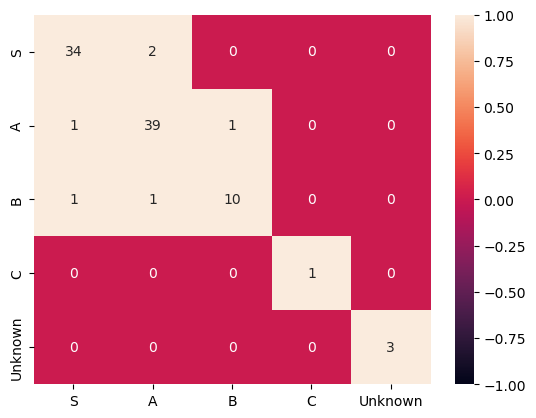

In [190]:
sns.heatmap(cm1,xticklabels=classnames, yticklabels=classnames,annot=True,vmin=-1,vmax=1)

In [191]:
y_test_pred = rfc.predict(X_test)
cm2 = confusion_matrix(y_test, y_test_pred)
cm2

array([[4, 0, 0, 0, 0],
       [0, 7, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

<Axes: >

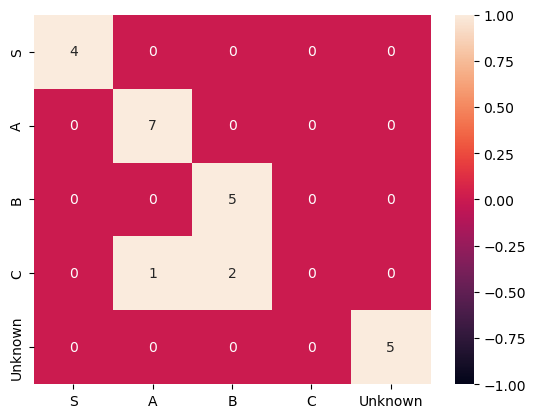

In [192]:
sns.heatmap(cm2,xticklabels=classnames, yticklabels=classnames,annot=True,vmin=-1,vmax=1)

In [194]:
print(f'Accuracy of Training set = {accuracy_score(y_train, y_train_pred)} and Test set = {accuracy_score(y_test,y_test_pred)}')

Accuracy of Training set = 0.9354838709677419 and Test set = 0.875


In [195]:
dataset = [78,15.6,85.0,34.0,93,18.6,13.000000,4.000000,35.6,85.2]

In [197]:
rfc.predict([dataset])

C:\ProgramData\anaconda31\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])